Load the Dataset

In [5]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('C:/Users/aksha/Downloads/Worlds Best 50 Hotels.csv', encoding='ISO-8859-1')

# Display the first few rows
df.head()



,Rank,Name,Location,Overview,Total Rooms,Starting Rate in ($),Dining Area,Drinking Area,Hotel Ammenties,Address,Number
0,1,Capella Bangkok,Bangkok,A calming riverside oasis in the centre of cac...,101,600,Côte by Mauro Colagreco and Phra Nakhon,Stella,"Swimming pool(s), spa/wellness centre, fitnes...","300, 2 Charoen Krung Rd, Yan Nawa, Sathon, Ban...",+66 2 098 3888
1,2,Passalacqua,Lake Como,A sumptuous Lake Como retreat made for enjoyin...,24,1300,The Garden Terrace,Bar Terrace,"Spa/wellness centre, fitness centre, family f...","Via Besana, 59, 22010 Moltrasio CO, Italy",+39 031 44311
2,3,Rosewood Hong Kong,Hong Kong,Masterful minimalism meets marble-lined luxury,413,650,Bluhouse and The Dining Room,Darkside,"Swimming pool, spa/wellness centre, fitness c...","18 Salisbury Rd, Tsim Sha Tsui, Hong Kong",+852 3891 8888
3,4,Cheval Blanc,Paris,Uber-stylish riverside luxury and world-class ...,72,3000,Langosteria,Le Tout-Paris,"Swimming pool(s), spa/wellness centre, fitnes...","8 Quai du Louvre, 75001 Paris, France",+33 1 40 28 00 00
4,5,The Upper House,Hong Kong,A temple of Zen high above Hong Kong,117,650,Salisterra,NaN,"Swimming pool, fitness centre, family friendly","88 Queensway, Admiralty, Hong Kong",NaN


Understand the Data Structure

In [6]:
# Check the data types of each column
df.info()

# Get summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  50 non-null     int64 
 1   Name                  50 non-null     object
 2   Location              50 non-null     object
 3   Overview              50 non-null     object
 4   Total Rooms           50 non-null     int64 
 5   Starting Rate in ($)  50 non-null     int64 
 6   Dining Area           50 non-null     object
 7   Drinking Area         46 non-null     object
 8   Hotel Ammenties       49 non-null     object
 9   Address               50 non-null     object
 10  Number                48 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


,Rank,Total Rooms,Starting Rate in ($)
count,50.00000,50.000000,50.000000
mean,25.50000,134.620000,1377.340000
std,14.57738,129.328231,853.332904
min,1.00000,12.000000,235.000000
25%,13.25000,52.250000,777.500000
50%,25.50000,104.000000,1200.000000
75%,37.75000,186.250000,1787.500000
max,50.00000,795.000000,4000.000000


In [16]:
# Fill missing values in 'Drinking Area' and 'Hotel Ammenties' with a placeholder
df['Drinking Area'] = df['Drinking Area'].fillna('Not Available')
df['Hotel Ammenties'] = df['Hotel Ammenties'].fillna('No Amenities')

# Drop rows where 'Number' is missing
df = df.dropna(subset=['Number'])

# Check if missing values are handled
df.isnull().sum()


Rank                    0
Name                    0
Location                0
Overview                0
Total Rooms             0
Starting Rate in ($)    0
Dining Area             0
Drinking Area           0
Hotel Ammenties         0
Address                 0
Number                  0
dtype: int64

Top 5 Hotels by Starting Rate
Let’s explore which hotels are the most expensive based on the Starting Rate in ($) column.

In [19]:
# Top 5 most expensive hotels by starting rate
top_5_expensive_hotels = df[['Name', 'Starting Rate in ($)']].sort_values(by='Starting Rate in ($)', ascending=False).head(5)
top_5_expensive_hotels


,Name,Starting Rate in ($)
19,Borgo Santandrea,4000
49,Kokomo Private Island,3500
39,Le Bristol,3200
14,Hôtel de Crillon,3000
3,Cheval Blanc,3000


Distribution of Total Rooms
Let’s visualize the distribution of the number of rooms across the hotels.

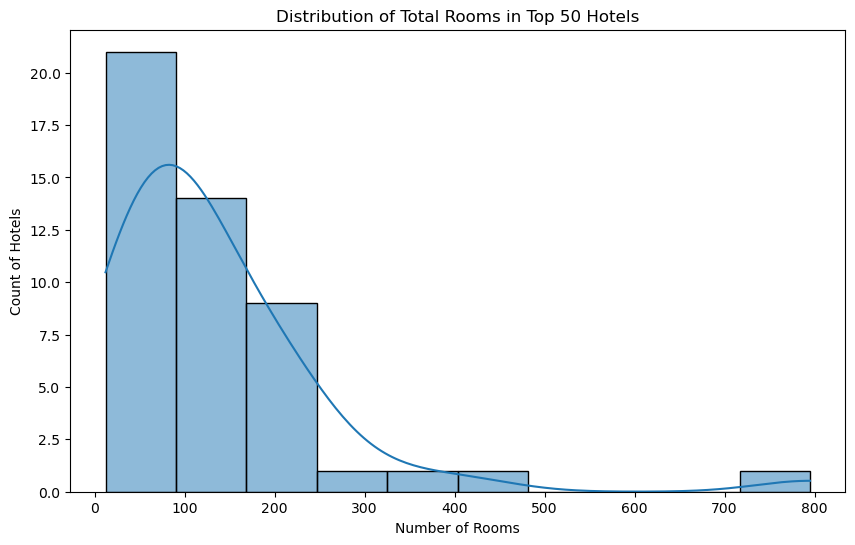

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the number of rooms
plt.figure(figsize=(10,6))
sns.histplot(df['Total Rooms'], bins=10, kde=True)
plt.title('Distribution of Total Rooms in Top 50 Hotels')
plt.xlabel('Number of Rooms')
plt.ylabel('Count of Hotels')
plt.show()


Hotels with the Most Amenities
Let’s check which hotels provide the most amenities

In [21]:
# Count the number of amenities per hotel (assuming amenities are separated by commas)
df['Amenity Count'] = df['Hotel Ammenties'].apply(lambda x: len(x.split(',')))

# Show the top 5 hotels with the most amenities
top_5_amenities = df[['Name', 'Amenity Count']].sort_values(by='Amenity Count', ascending=False).head(5)
top_5_amenities


,Name,Amenity Count
34,Hotel Bel-Air,9
8,Atlantis The Royal,8
20,Desa Potato Head,8
30,La Mamounia,8
49,Kokomo Private Island,7


Hotel Distribution by Location
Let’s visualize how hotels are distributed by location.

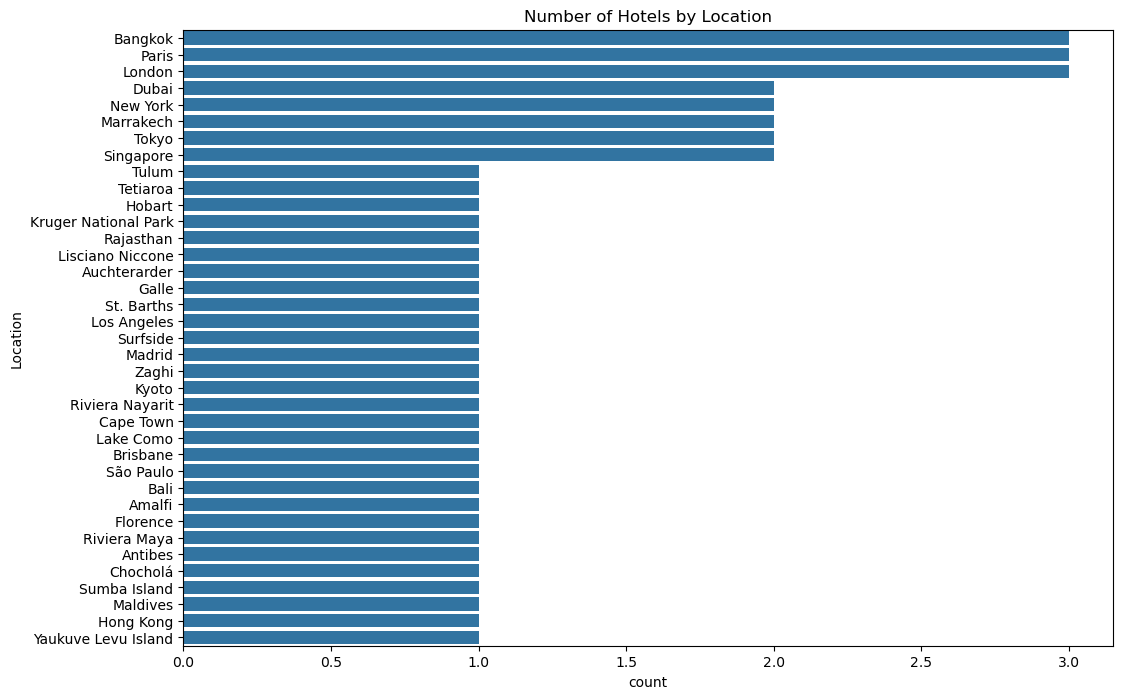

In [22]:
# Plot the number of hotels by location
plt.figure(figsize=(12,8))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Number of Hotels by Location')
plt.show()


Summary:
   1. Top 5 Expensive Hotels: Find the most expensive hotels based on the starting rate.
   2. Distribution of Rooms: Visualize how the number of rooms is distributed.
   3. Most Amenities: Identify the hotels that offer the most amenities.
   4. Location Distribution: See which locations have the most top hotels.